In [1]:
from LFWDataLoader import TripletDataLoader, ImageDataLoader
from train import grid_search_triplet, grid_search_siemse
import torch
import os

##  Create Data From LFW Database for Siemse Network

Statistics for Train Set:
Total Samples: 1760
Class 0: 887 samples
Class 1: 873 samples
Statistics for Validation Set:
Total Samples: 440
Class 0: 213 samples
Class 1: 227 samples
Statistics for Test Set:
Total Samples: 1000
Class 0: 500 samples
Class 1: 500 samples
Statistics saved to dataset_statistics.txt


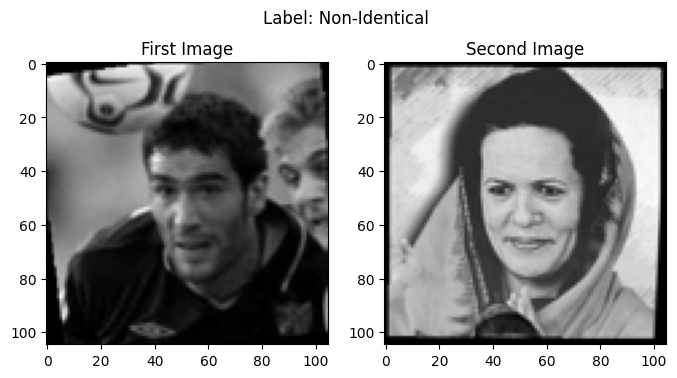

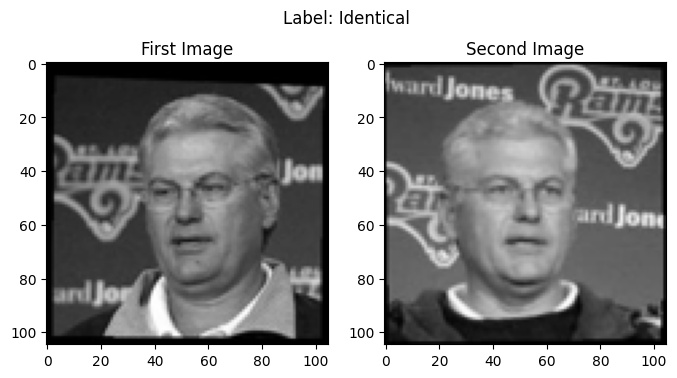

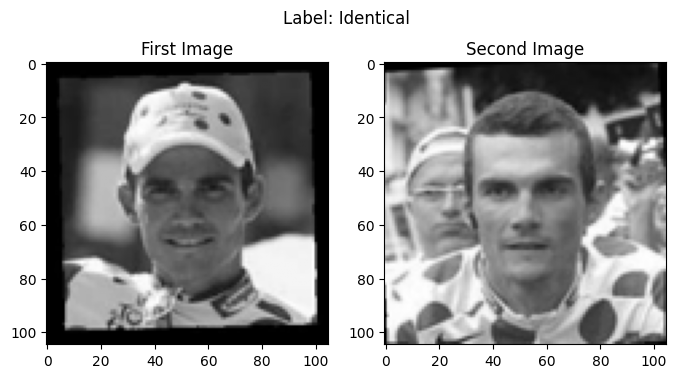

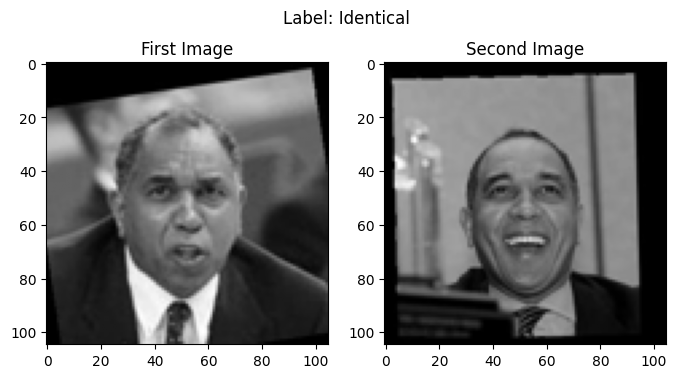

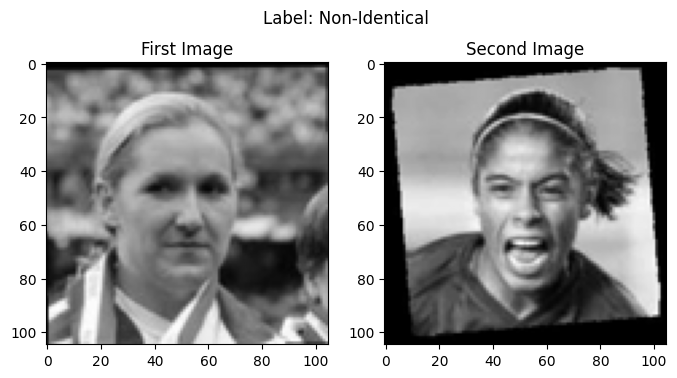

In [2]:
loader = ImageDataLoader(data_directory='data/lfwa/lfw2/lfw2', output_file='data/dataset.pkl')
if os.path.exists('data/dataset.pkl'):
    dataset_path = 'data/dataset.pkl'
else:
    dataset_path = loader.load_dataset('data/pairsDevTrain.txt', 'data/pairsDevTest.txt')
loader.generate_statistics()
loader.visualize_sample_pairs()

## Perform Grid Search On Siemese Network

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
param_grid = {
        'dropout': [0, 0.3, 0.7],
        'weight_decay': [0.1,0.01, 0.001],
        'lr': [0.0005,0.005],
        'batch_size': [16, 32, 64],
        'network_size': ["small","medium", "large"],
        'use_batchnorm': [True],
        'augment_type': ['basic','oversample']  # Added augmentation options
    }

grid_search_siemse(dataset_path,device, param_grid)


##  Create Data From LFW Database for Triplet Network

In [4]:
loader = TripletDataLoader(data_directory='data/lfwa/lfw2/lfw2', output_file='triplet_dataset.pkl')
loader.load_dataset('data/pairsDevTrain.txt', 'data/pairsDevTest.txt')

Grouping images by class...


Creating training triplets...
Total triplets created: 7404
Sample triplets (array shapes):
Triplet 1: Anchor (105, 105, 1), Positive (105, 105, 1), Negative (105, 105, 1)
Triplet 2: Anchor (105, 105, 1), Positive (105, 105, 1), Negative (105, 105, 1)
Triplet 3: Anchor (105, 105, 1), Positive (105, 105, 1), Negative (105, 105, 1)
Creating validation triplets...
Total triplets created: 1760
Sample triplets (array shapes):
Triplet 1: Anchor (105, 105, 1), Positive (105, 105, 1), Negative (105, 105, 1)
Triplet 2: Anchor (105, 105, 1), Positive (105, 105, 1), Negative (105, 105, 1)
Triplet 3: Anchor (105, 105, 1), Positive (105, 105, 1), Negative (105, 105, 1)
Loading training data...


Processing pairs: 100%|██████████| 2200/2200 [00:04<00:00, 468.14it/s]


Splitting training data into training and validation sets...
Loading test data...


Processing pairs: 100%|██████████| 1000/1000 [00:02<00:00, 470.50it/s]


Saving processed data to file...
Dataset saved to triplet_dataset.pkl


## Perform Grid Search On Triplet Network

In [ ]:
param_grid = {
    'batch_size': [128, 64, 32],
    'num_epochs': [20],
    'learning_rate': [0.0001, 0.01, 0.1],
    'weight_decay': [0.0005],
    'resize_value': [128 , 105],
    'patience': [7],
    'embedding_size': [512],
    'dropout': [True, False], # if True, dropout is 0.4
    'batchnorm': [True],
    'network_size': ['small', 'medium', 'large']
}

grid_search_triplet('data/triplet_dataset.pkl', param_grid)

Testing configuration: {'batch_size': 128, 'num_epochs': 20, 'learning_rate': 0.0001, 'weight_decay': 0.0005, 'resize_value': 128, 'patience': 7, 'embedding_size': 512, 'dropout': True, 'batchnorm': True, 'network_size': 'small'}
Run on cuda
dict_keys(['val_accuracy', 'roc_auc', 'best_threshold', 'best_threshold_accuracy', 'triplet_accuracy'])
Epoch 1/20, Train Loss: 1.0073, Validation Loss: 0.7007, Validation Accuracy: 0.4341, ROC AUC: 0.3025, Best Threshold Accuracy: 0.6545, Triplet Accuracy: 0.6860
dict_keys(['val_accuracy', 'roc_auc', 'best_threshold', 'best_threshold_accuracy', 'triplet_accuracy'])
Epoch 2/20, Train Loss: 0.5356, Validation Loss: 0.7052, Validation Accuracy: 0.4614, ROC AUC: 0.2760, Best Threshold Accuracy: 0.6773, Triplet Accuracy: 0.7110
dict_keys(['val_accuracy', 'roc_auc', 'best_threshold', 'best_threshold_accuracy', 'triplet_accuracy'])
Epoch 3/20, Train Loss: 0.3616, Validation Loss: 0.7054, Validation Accuracy: 0.4523, ROC AUC: 0.2608, Best Threshold Accura